In [1]:
# импортируем датасеты, модуль SVM, метрики и функцию train_test_split
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
# загружаем данные
digits = datasets.load_digits()

In [3]:
# тип объекта - Bunch
type(digits)

sklearn.utils.Bunch

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# посмотрим сколько изображений
len(digits.images)

1797

In [6]:
# выведем матрицу первого изображения
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
digits.images[0].shape

(8, 8)

In [8]:
digits.images[0].size

64

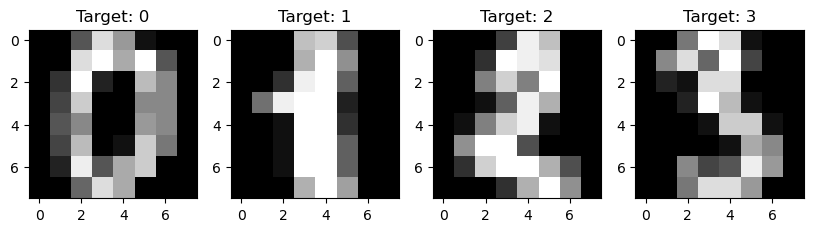

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 4, figsize = (10,30))

# в цикле for создадим кортеж из трех объектов: id изображения (всего их будет 4), самого изображения и
# того, что на нем представлено (целевой переменной)
for ax, image, label in zip(axes, digits.images, digits.target):
    # на каждой итерации заполним соответствующее пространство картинкой
    ax.imshow(image, cmap = 'gray')
    # и укажем какой цифре соответствует изображение с помощью f форматирования
    ax.set_title(f'Target: {label}')

### Подготовка данных

In [14]:
# превратим двумерную матрицу в одномерный массив (flatten the images)
 
# для этого создадим переменную с количеством изображений
n_samples = len(digits.images)
 
# и превратим каждое изображение в одномерный массив, где 
# строками будут изображения, а столбцами - их признаки (пиксели)
digits_t = digits.images.reshape((n_samples, -1))

# снова выведем первое изображение
digits_t[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
digits_t[0].shape

(64,)

In [16]:
digits_t.shape

(1797, 64)

### Обучение модели

In [17]:
# подготовим данные в формате X и y для наглядности
X = digits_t
y = digits.target

# создадим объект классификатора (Support Vector Classifier) из модуля SVM
svc_model = svm.SVC()
 
# разделим выборки на обучающую и тестовую, размер тестовой выборки 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
 
# обучим классификатор с помощью метода fit()
svc_model.fit(X_train, y_train)
 
# сделаем прогноз того, что представлено на картинке
y_pred = svc_model.predict(X_test)

In [18]:
# с помощью атрибута support_ мы можем посмотреть на индексы точек (изображений),
# которые использовались в качестве опорных векторов при обучении
svc_model.support_[:15]

array([ 79,  93, 126, 229, 325, 345, 402, 409, 428, 443, 455, 478, 485,
       582, 608])

In [19]:
# если применить индексы support_ к нашему датасету, то мы выберем только те изображения,
# которые использовал классификатор (их было 613)
X[svc_model.support_].shape

(613, 64)

In [20]:
# это примерно половина обучающей выборки
X_train.shape

(1257, 64)

### Оценка качества модели

In [21]:
print("Accuracy:", np.round(metrics.accuracy_score(y_test, y_pred), 2))

Accuracy: 0.99


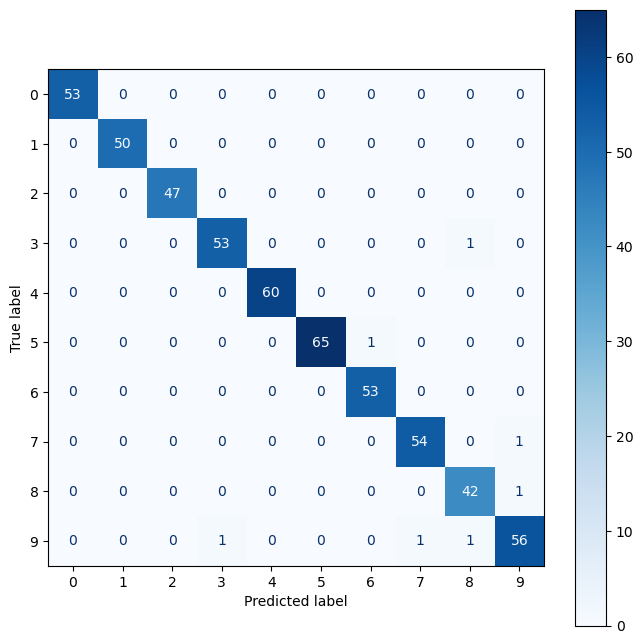

In [22]:
# чтобы вывести матрицу ошибок, мы вначале создаем для нее пространство нужного нам размера
fig, ax = plt.subplots(figsize = (8, 8))

# а затем используем метод .from_estimator() класса ConfusionMatrixDisplay, которому передаем объект модели,
# данные для проверки, цветовую схему и переменную пространства, куда мы и поместим матрицу
metrics.ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test, cmap = plt.cm.Blues, ax = ax)

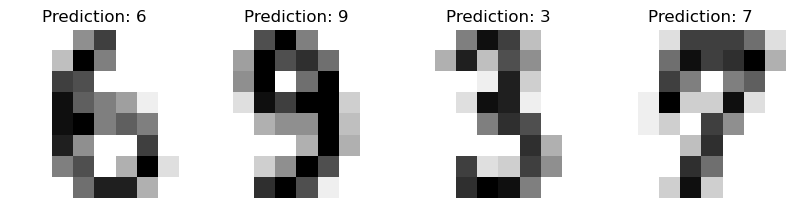

In [23]:
# посмотрим на результат визуально 
fig, axes = plt.subplots(1, 4, figsize = (10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):

    # убрать рамку вокруг изображений
    ax.set_axis_off()

    # каждое изображение нужно восстановить до массива 2D 
    image = image.reshape(8, 8)

    # в функции imshow изменим параметр cmap = plt.cm.gray_r 
    # это обратная серая цветовая схема
    ax.imshow(image, cmap = plt.cm.gray_r)

    # прогноз для каждого изображения
    ax.set_title(f'Prediction: {prediction}')